In [7]:
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('fivethirtyeight')

## Visualization methods:

In [25]:
class visualization():
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parameters = None

    def scatter_plot(self):
        
        fig, ax = plt.subplots(figsize=(11, 4))
        ax.set_xlabel(x.name)
        ax.set_ylabel(y.name)
        ax.scatter(x, y);
        
        

In [70]:
import numpy as np
x = pd.Series(np.linspace(0.0,10.0, num=100), name='X')
a = 4.0
b = -3.5
c = 0.0
y = pd.Series((a*(x**2)) + (b*x) + c, name='y')

#   let's add noise to the data
#   np.random.normal(mean, standardDeviation, num)
noise = np.random.normal(0, 10., 100)
y = y + noise

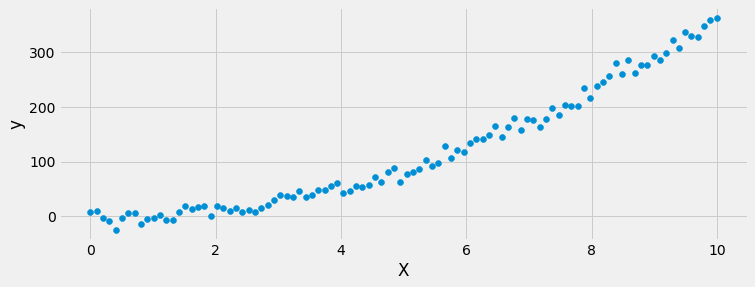

In [71]:
viz = visualization(x, y)
viz.scatter_plot()

In [79]:
def calcLogLikelihood(guess, true, n):
    error = true-guess
    sigma = np.std(error)
    f = ((1.0/(2.0*math.pi*sigma*sigma))**(n/2))* \
        np.exp(-1*((np.dot(error.T,error))/(2*sigma*sigma)))
    return np.log(f)



def objective(var):
    """ Returns objective function """
    #   load my  data
    yGuess = (var[2]*(x**2)) + (var[1]*x) + var[0]
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return (-1*f)

In [80]:
#  Let's pick some random starting points for the optimization    
nvar = 3
var = np.zeros(nvar)
var[0] = -15.5
var[1] = 19.5
var[2] = -1.0

#  maximize the likelihood (minimize -1*max(likelihood)
res = minimize(objective, var, method='BFGS',
                options={'disp': True})

y_preds = (res.x[2]*(x**2)) + (res.x[1]*x) + res.x[0]

Optimization terminated successfully.
         Current function value: 368.148430
         Iterations: 14
         Function evaluations: 88
         Gradient evaluations: 22


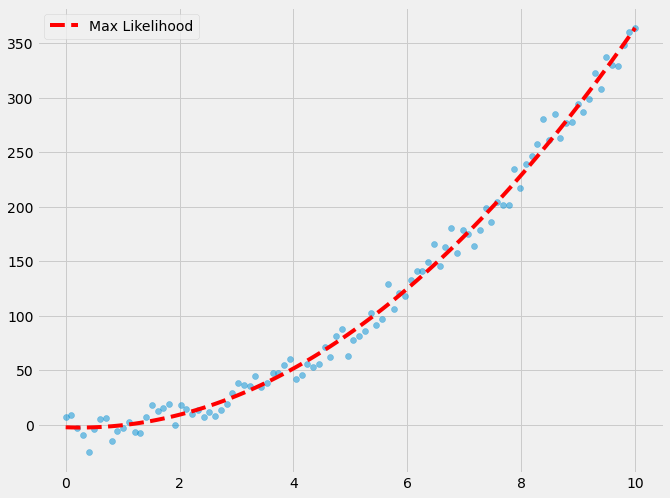

In [91]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_preds, '--r', label='Max Likelihood')
plt.grid(True)
plt.legend(loc=2)
plt.show()
